ML Project

Steps:
1. Get the Data, currently attempting redfin as zillow does not have granularity needed
   - Redfin did not have data at granularity either
   - Using https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset for now
3. Explore the Data
4. Clean/Pre Process the Data if needed

5. Attempt Linear regression

Loading Libaries and Creating function to load dataset

In [1]:
import pandas as pd
import os

HOUSING_PATH = "Data"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "realtor-data.zip.csv")
    return pd.read_csv(csv_path)


Loading Dataset by calling function and peaking at data

In [2]:
housing = load_housing_data()
housing.head()

status  bed  bath  acre_lot        city        state  zip_code  \
0  for_sale  3.0   2.0      0.12    Adjuntas  Puerto Rico     601.0   
1  for_sale  4.0   2.0      0.08    Adjuntas  Puerto Rico     601.0   
2  for_sale  2.0   1.0      0.15  Juana Diaz  Puerto Rico     795.0   
3  for_sale  4.0   2.0      0.10       Ponce  Puerto Rico     731.0   
4  for_sale  6.0   2.0      0.05    Mayaguez  Puerto Rico     680.0   

   house_size prev_sold_date     price  
0       920.0            NaN  105000.0  
1      1527.0            NaN   80000.0  
2       748.0            NaN   67000.0  
3      1800.0            NaN  145000.0  
4         NaN            NaN   65000.0

Exploring Data

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          904966 non-null  object 
 1   bed             775126 non-null  float64
 2   bath            791082 non-null  float64
 3   acre_lot        638324 non-null  float64
 4   city            904894 non-null  object 
 5   state           904966 non-null  object 
 6   zip_code        904762 non-null  float64
 7   house_size      612080 non-null  float64
 8   prev_sold_date  445865 non-null  object 
 9   price           904895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 69.0+ MB


Null Counts:
<br>Bed and Bath (Maybe this is for land sales)
<br>Acre_lot (???)
<br>house size (Just for land sales?)
<br>Prev_sold_date (First time sold?, new contructions)

In [60]:
housing.describe()

bed           bath       acre_lot       zip_code  \
count  775126.000000  791082.000000  638324.000000  904762.000000   
mean        3.332190       2.484236      17.317292    6519.464582   
std         2.065312       1.931622     970.707378    3816.713093   
min         1.000000       1.000000       0.000000     601.000000   
25%         2.000000       2.000000       0.110000    2908.000000   
50%         3.000000       2.000000       0.290000    6811.000000   
75%         4.000000       3.000000       1.150000    8854.000000   
max       123.000000     198.000000  100000.000000   99999.000000   

         house_size         price  
count  6.120800e+05  9.048950e+05  
mean   2.138437e+03  8.774382e+05  
std    3.046600e+03  2.457698e+06  
min    1.000000e+02  0.000000e+00  
25%    1.132000e+03  2.685000e+05  
50%    1.650000e+03  4.750000e+05  
75%    2.495000e+03  8.300000e+05  
max    1.450112e+06  8.750000e+08

Zip Code - Dimensional Data, therefore mean, std, etc doesn't make sense
<br>Bed & Bath - Max values seem strange




# Plotting the data

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt

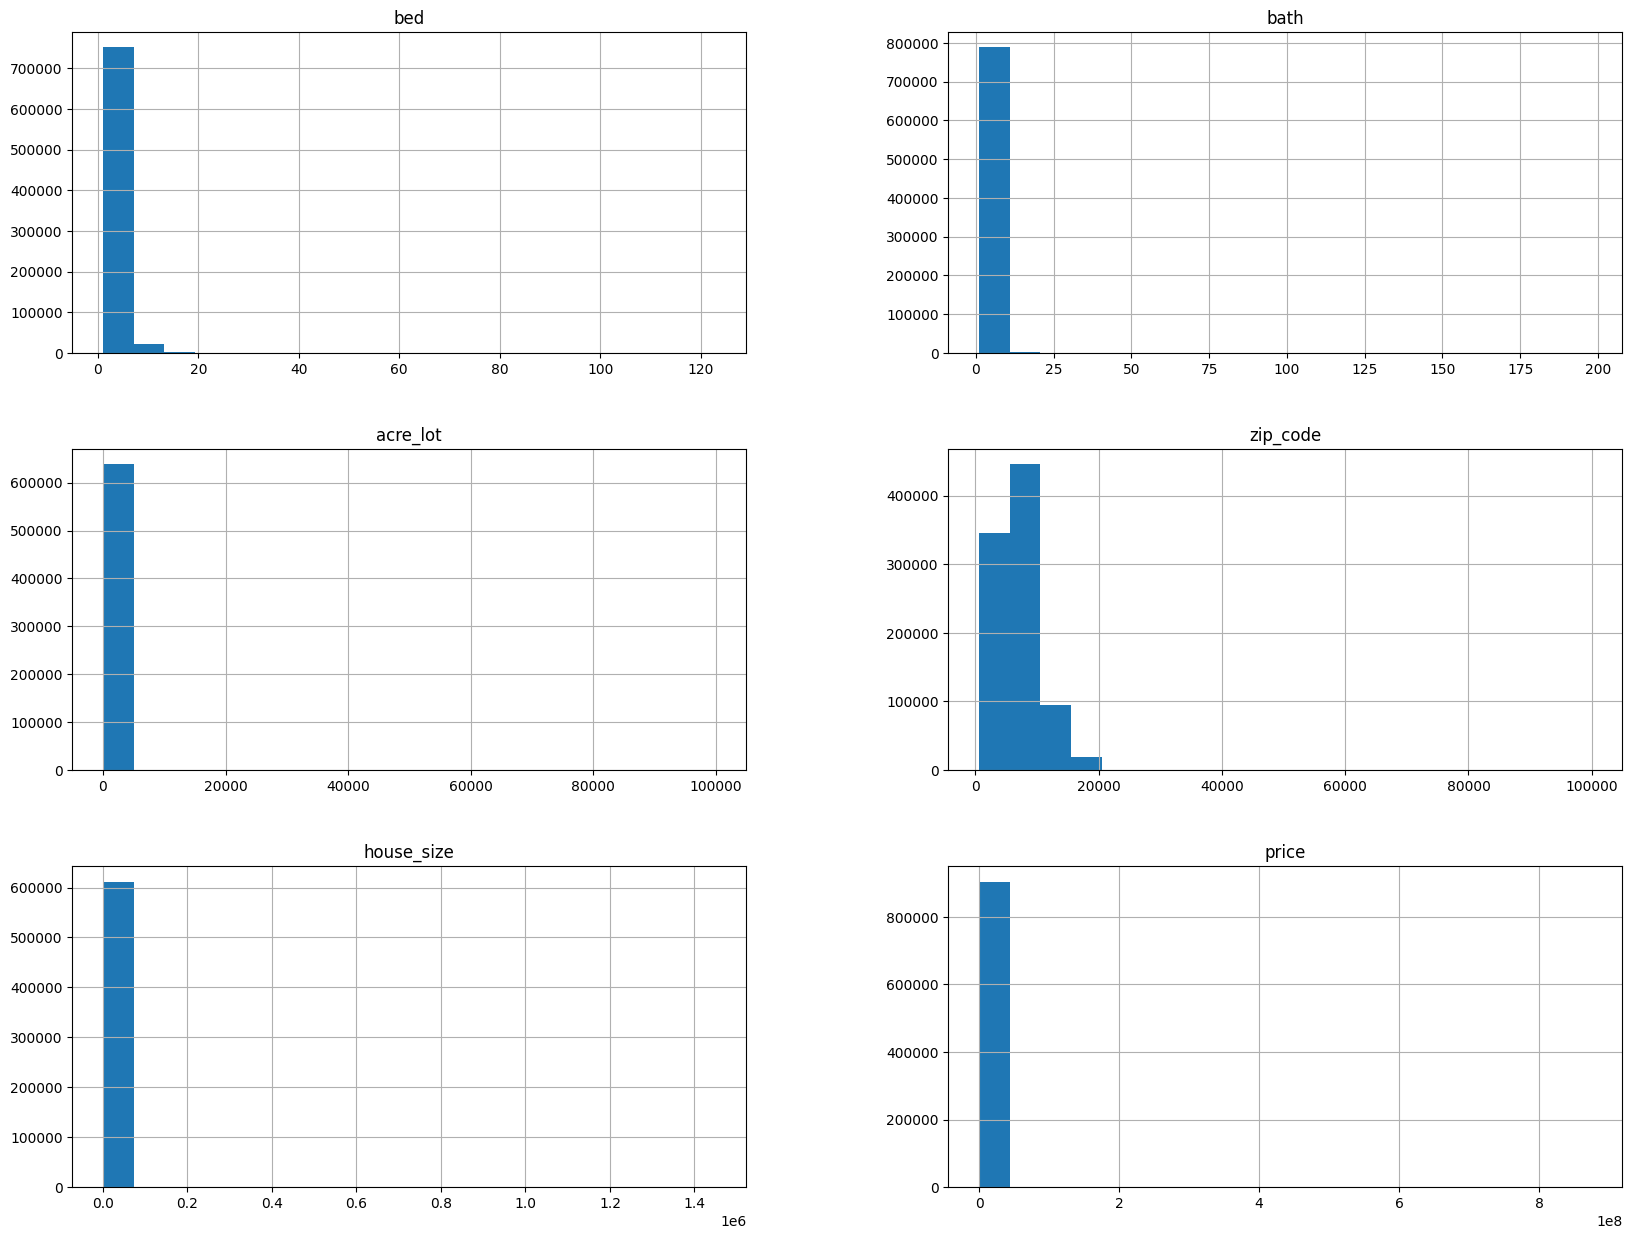

In [61]:

housing.hist(bins=20, figsize=(20,15))
plt.show()

In [4]:
import numpy as np
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

In [6]:
train_set, test_set = split_train_test(housing, 0.2)

In [137]:
housing = train_set.copy()
attributes =["bed", "bath", "acre_lot", "zip_code", "house_size", "price"]
corr_matrix = housing[attributes].corr()
corr_matrix

bed      bath  acre_lot  zip_code  house_size     price
bed         1.000000  0.720499 -0.004082 -0.082114    0.499106  0.165806
bath        0.720499  1.000000 -0.000881 -0.051713    0.482799  0.285117
acre_lot   -0.004082 -0.000881  1.000000  0.002572    0.107691  0.005712
zip_code   -0.082114 -0.051713  0.002572  1.000000   -0.051990  0.074113
house_size  0.499106  0.482799  0.107691 -0.051990    1.000000  0.223192
price       0.165806  0.285117  0.005712  0.074113    0.223192  1.000000

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[attributes], figsize=(12, 8))

array([[<Axes: xlabel='bed', ylabel='bed'>,
        <Axes: xlabel='bath', ylabel='bed'>,
        <Axes: xlabel='acre_lot', ylabel='bed'>,
        <Axes: xlabel='zip_code', ylabel='bed'>,
        <Axes: xlabel='house_size', ylabel='bed'>,
        <Axes: xlabel='price', ylabel='bed'>],
       [<Axes: xlabel='bed', ylabel='bath'>,
        <Axes: xlabel='bath', ylabel='bath'>,
        <Axes: xlabel='acre_lot', ylabel='bath'>,
        <Axes: xlabel='zip_code', ylabel='bath'>,
        <Axes: xlabel='house_size', ylabel='bath'>,
        <Axes: xlabel='price', ylabel='bath'>],
       [<Axes: xlabel='bed', ylabel='acre_lot'>,
        <Axes: xlabel='bath', ylabel='acre_lot'>,
        <Axes: xlabel='acre_lot', ylabel='acre_lot'>,
        <Axes: xlabel='zip_code', ylabel='acre_lot'>,
        <Axes: xlabel='house_size', ylabel='acre_lot'>,
        <Axes: xlabel='price', ylabel='acre_lot'>],
       [<Axes: xlabel='bed', ylabel='zip_code'>,
        <Axes: xlabel='bath', ylabel='zip_code'>,
        <A

Error in callback <function _draw_all_if_interactive at 0x0000025BB217B9C0> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x0000025BB21ACE00> (for post_execute):


KeyboardInterrupt: 

Deal with Nulls:
<br>Bed and Bath: Drop for now (Come back and use house size to determine if a house was sold?)


In [144]:
def prepare_data(data):
    data = data.dropna(subset=['bed','bath'])
    data = data[data["acre_lot"] <20000]
    data = data.dropna(subset=["house_size"])
    data = data.drop("status",axis=1)
    data = data.drop("city",axis=1)
    data = data.drop("state",axis=1)
    data = data.drop("prev_sold_date",axis=1)
    prepared = data.dropna(subset="zip_code")
    
    return prepared
    

Acre_lot (???)


NameError: name 'plt' is not defined

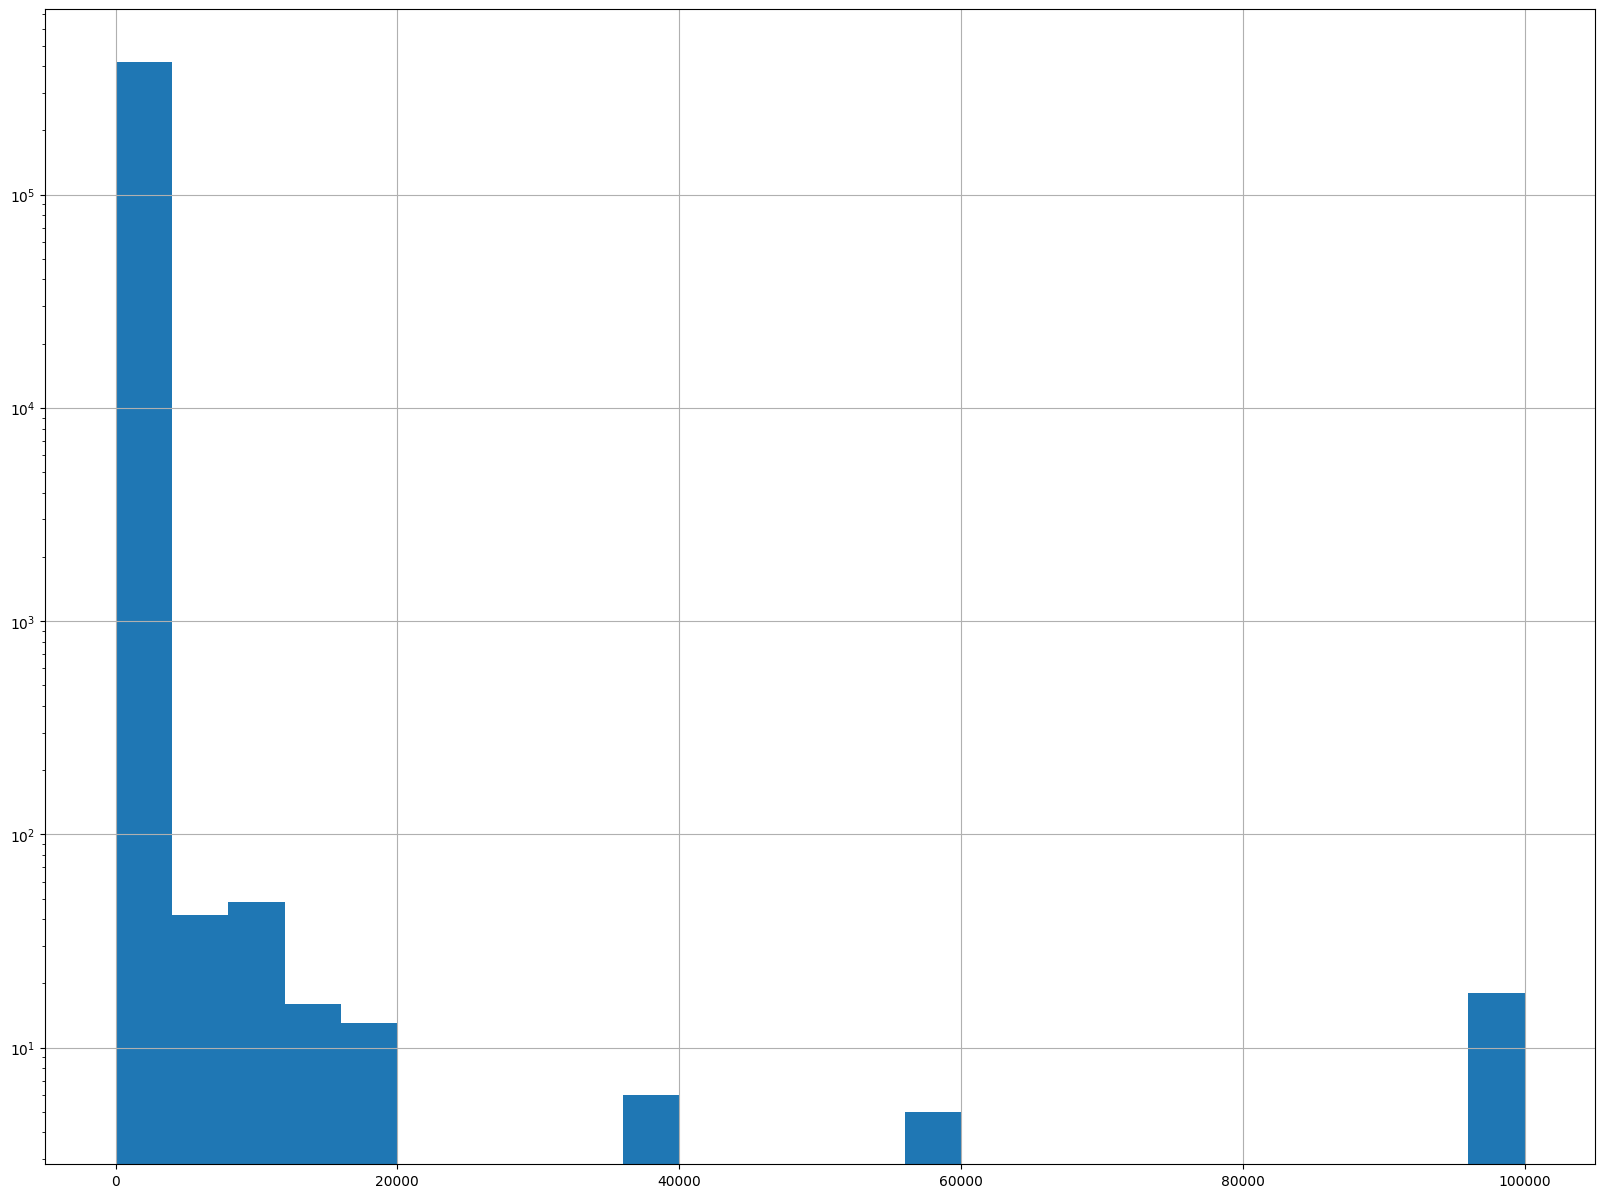

In [26]:
housing_c1['acre_lot'].hist(bins=25, figsize=(20,15),log=True)
plt.show()

Going to remove all values ~20000 acre size

<br>house size: Going to drop records without house size


In [119]:
housing_c3 = housing_c2.dropna(subset=["house_size"])
housing_c4 = housing_c3.drop("status",axis=1)
housing_c5 = housing_c4.drop("city",axis=1)
housing_c6 = housing_c5.drop("state",axis=1)
housing_c7 = housing_c6.drop("prev_sold_date",axis=1)
housing_c8 = housing_c7.dropna(subset="zip_code")
x = housing_c8.drop("price",axis=1)
nan_count = x.isna().sum()

y = housing_c8["price"]
nan_count

bed           0
bath          0
acre_lot      0
zip_code      0
house_size    0
dtype: int64

In [142]:
housing

status   bed  bath  acre_lot                    city          state  \
903666  for_sale   3.0   2.0       NaN                Brooklyn       New York   
513460  for_sale   5.0   3.0      0.06                Flushing       New York   
902606  for_sale   1.0   1.0       NaN             Jersey City     New Jersey   
258530  for_sale   2.0   1.0       NaN                   Epsom  New Hampshire   
659874  for_sale   4.0   2.0      0.17              Barrington     New Jersey   
...          ...   ...   ...       ...                     ...            ...   
416913  for_sale   3.0   3.0      1.31               Woodstock    Connecticut   
384129  for_sale   6.0   3.0      0.38               Ellington    Connecticut   
632261  for_sale   3.0   3.0      0.22                Claymont       Delaware   
138773  for_sale  12.0   3.0      0.10                  Boston  Massachusetts   
464115  for_sale   4.0   1.0      0.23  Caldwell Boro Township     New Jersey   

        zip_code  house_size prev_sold_date      price  
903666   11220.0       924.0     2018-08-20   760000.0  
513460   11355.0         NaN     1999-04-30  1549888.0  
902606    7306.0       631.0     2019-07-25   329000.0  
258530    3234.0      1002.0            NaN    59000.0  
659874    8007.0      1726.0     1998-12-31   269900.0  
...          ...         ...            ...        ...  
416913    6281.0      2292.0     2018-09-17   465000.0  
384129    6029.0      3528.0     2019-10-02   319900.0  
632261   19703.0      1600.0     2020-05-13   360000.0  
138773    2124.0      4362.0            NaN  1500000.0  
464115    7006.0         NaN     2015-12-18   415000.0  

[723973 rows x 10 columns]

In [145]:
prepared_data = prepare_data(housing)
prepared_data

bed  bath  acre_lot  zip_code  house_size       price
659874   4.0   2.0      0.17    8007.0      1726.0    269900.0
251517   4.0   2.0      0.21    3079.0      2047.0    425900.0
6902     5.0   3.0      0.27     927.0      3559.0    835000.0
108710   2.0   3.0      0.07    2199.0      3168.0  10800000.0
201930   7.0   3.0      6.17    2649.0      1881.0    550000.0
...      ...   ...       ...       ...         ...         ...
436548   3.0   2.0      0.28    6026.0      1520.0    249900.0
416913   3.0   3.0      1.31    6281.0      2292.0    465000.0
384129   6.0   3.0      0.38    6029.0      3528.0    319900.0
632261   3.0   3.0      0.22   19703.0      1600.0    360000.0
138773  12.0   3.0      0.10    2124.0      4362.0   1500000.0

[330369 rows x 6 columns]

In [148]:

prepared_train_x = prepared_data.drop("price",axis=1)
prepared_train_y = prepared_data["price"]

xnan_count = prepared_train_x.isna().sum()
xnan_count

bed           0
bath          0
acre_lot      0
zip_code      0
house_size    0
dtype: int64

In [150]:
prepared_train_y

659874      269900.0
251517      425900.0
6902        835000.0
108710    10800000.0
201930      550000.0
             ...    
436548      249900.0
416913      465000.0
384129      319900.0
632261      360000.0
138773     1500000.0
Name: price, Length: 330369, dtype: float64

In [149]:
ynan_count = prepared_train_y.isna().sum()
ynan_count

0

<br>Prev_sold_date (Time series? For now I'll drop but, I may add back in as boolean)

In [151]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(prepared_train_x,prepared_train_y)

LinearRegression()

In [152]:
housing_test = test_set.copy()
prepared_test_data = prepare_data(housing_test)
prepared_test_data


bed  bath  acre_lot  zip_code  house_size      price
183923  4.0   3.0      0.09    2138.0      3006.0  1400000.0
143706  5.0   6.0      1.84    2090.0      7840.0  2750000.0
125255  2.0   1.0      0.23    1832.0      1108.0   399900.0
644179  3.0   2.0      0.25    8046.0      2429.0   319000.0
113769  4.0   1.0      0.11    2861.0      1165.0   280000.0
...     ...   ...       ...       ...         ...        ...
414708  3.0   1.0      1.00    6441.0      1040.0   255000.0
103984  6.0   3.0      0.07    2145.0      3330.0  1550000.0
110883  3.0   3.0      0.10    2446.0      2543.0  2299000.0
600385  6.0   6.0      3.47    7920.0      4800.0  1779000.0
203346  2.0   1.0     21.64    2532.0      1060.0   265000.0

[82714 rows x 6 columns]

In [153]:
prepared_test_x = prepared_test_data.drop("price",axis=1)
prepared_test_y = prepared_test_data["price"]

In [154]:
predictions = lin_reg.predict(prepared_test_x)
predictions



array([ 899547.83943611, 2216912.19321333,  285225.58811607, ...,
        887905.48696337, 1752507.61003903,  283454.25011473])

In [162]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('mean_squared_error : ', mean_squared_error(prepared_test_y, predictions, squared = False))
print('mean_absolute_error : ', mean_absolute_error(prepared_test_y, predictions))

mean_squared_error :  1496010.1195543318
mean_absolute_error :  455542.97639239434


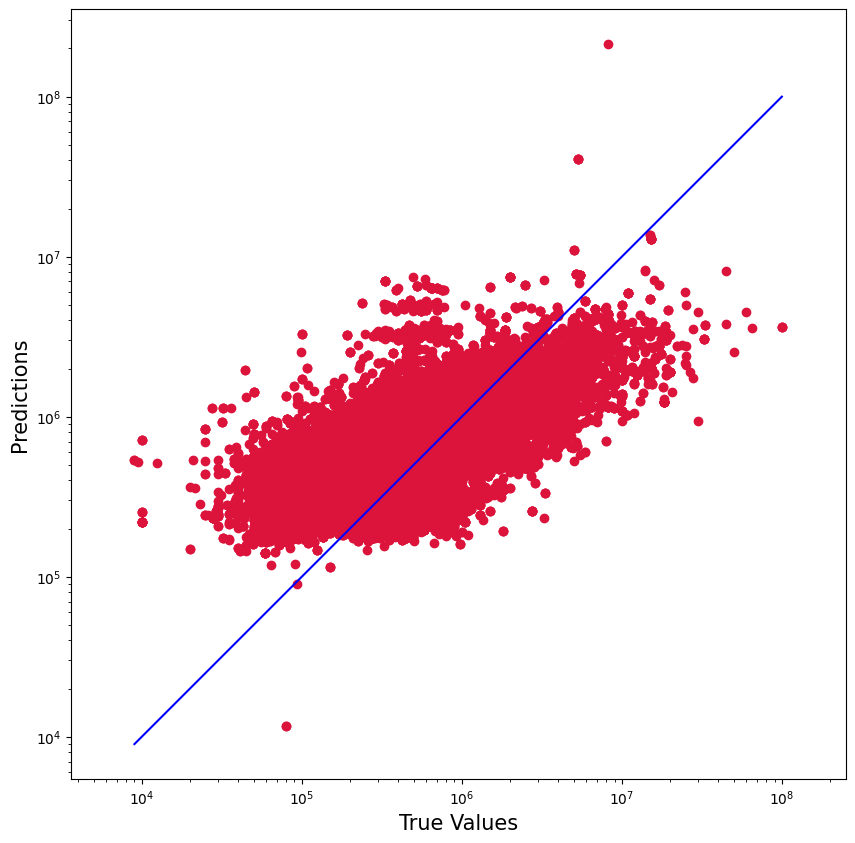

In [163]:
plt.figure(figsize=(10,10))
plt.scatter(prepared_test_y, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prepared_test_y), max(prepared_test_y))
p2 = min(min(prepared_test_y), min(prepared_test_y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()